# Week 3 Part 2 Solutions

In [3]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import rebound
import time
import numpy as np

In [54]:
def simulate(tend):
    Noutputs = 1000
    times = np.linspace(0, tend, Noutputs)
    a1 = np.zeros(Noutputs)
    a2 = np.zeros(Noutputs)
    e1 = np.zeros(Noutputs)
    e2 = np.zeros(Noutputs)
    l1 = np.zeros(Noutputs)
    l2 = np.zeros(Noutputs)

    P2 = sim.orbits()[1].P
    P1 = sim.orbits()[0].P
    print("Initial period ratio = ", P2/P1)
    
    for i,t in enumerate(times):
        sim.integrate(t, exact_finish_time=1)
        a1[i] = sim.orbits()[0].a
        e1[i] = sim.orbits()[0].e
        a2[i] = sim.orbits()[1].a
        e2[i] = sim.orbits()[1].e
        l1[i] = sim.orbits()[0].l
        l2[i] = sim.orbits()[1].l
    
    fig = plt.figure(figsize=(4,6))

    gs = GridSpec(nrows=6, ncols=1, height_ratios=[2, 1, 1, 1, 1, 1], hspace=0.05)

    axes = []
    for i in range(5):
        ax = fig.add_subplot(gs[i, 0], sharex=axes[0] if axes else None)
        axes.append(ax)

    axes[0].plot(times, np.rad2deg(l1)-180)
    axes[0].plot(times, np.rad2deg(l2)-180, ":")
    axes[0].set_ylim((-180,180))
    axes[1].plot(times, a2, ":")
    axes[2].plot(times, a1)
    axes[3].plot(times, e2, ":")
    axes[4].plot(times, e1)

    for ax in axes[:-1]:
        ax.tick_params(labelbottom=False)
    axes[-1].set_xlabel("t (yr)")

    plt.show()

Initial period ratio =  2.4514220415206562


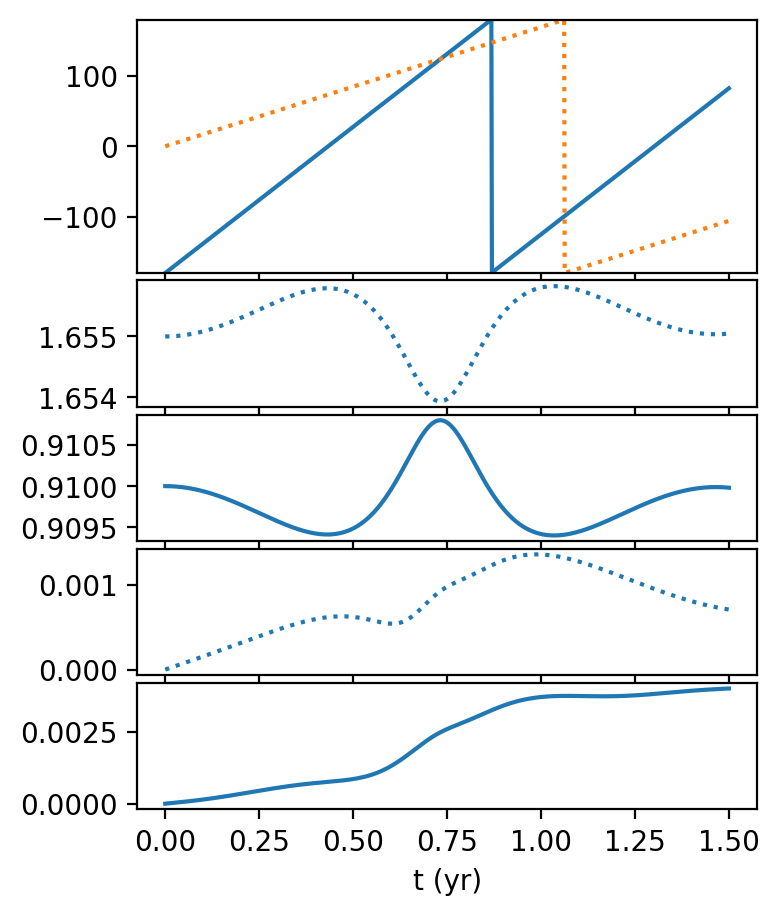

In [55]:
# Fig 2
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=0.91, e=0)    # 1
sim.add(m=1e-3, a=1.655, e=0, l=np.pi)  # 2
sim.move_to_com()

simulate(1.5)

Initial period ratio =  2.4514220415206593


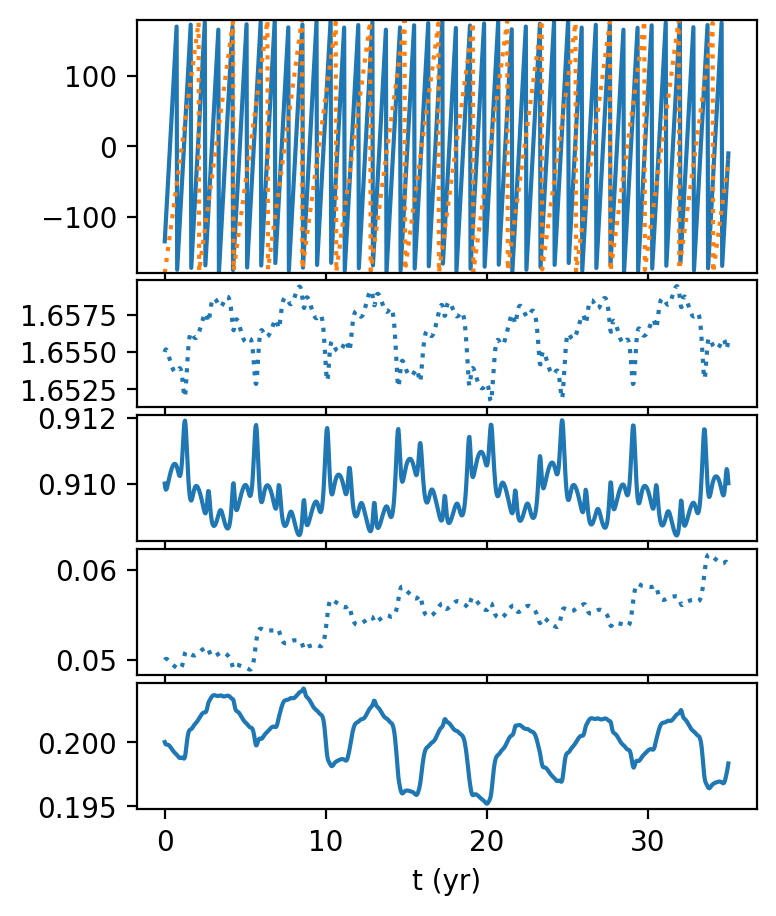

In [56]:
# Fig 3
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=0.91, e=0.2, pomega=np.pi/4)    # 1
sim.add(m=1e-3, a=1.655, e=0.05)  # 2
sim.move_to_com()

simulate(35)

Initial period ratio =  2.00899675561506


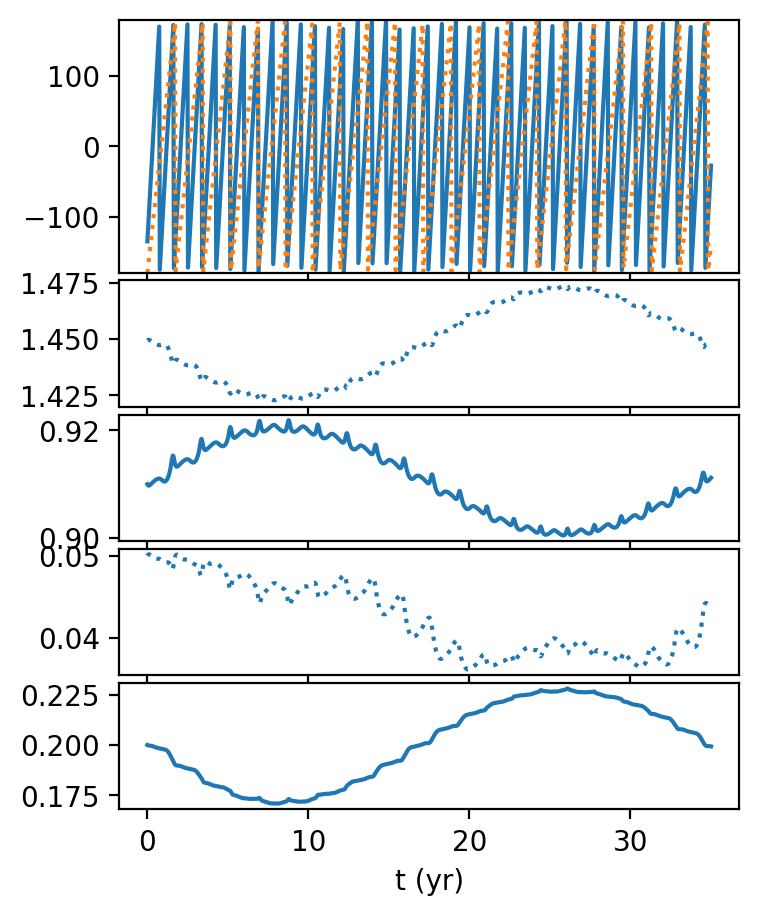

In [57]:
# Fig 4
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=0.91, e=0.2, pomega=np.pi/4)    # 1
sim.add(m=1e-3, a=0.91 * 2.01**(2/3), e=0.05)  # 2
sim.move_to_com()

simulate(35)

In [127]:
def simulate_kozai(tend):
    Noutputs = 1000
    times = np.linspace(0, tend, Noutputs)
    a1 = np.zeros(Noutputs)
    a2 = np.zeros(Noutputs)
    e1 = np.zeros(Noutputs)
    e2 = np.zeros(Noutputs)
    inc = np.zeros(Noutputs)
    
    for i,t in enumerate(times):
        sim.integrate(t, exact_finish_time=1)
        a1[i] = sim.orbits()[0].a
        e1[i] = sim.orbits()[0].e
        a2[i] = sim.orbits()[1].a
        e2[i] = sim.orbits()[1].e
        inc[i] = sim.orbits()[0].inc

    fig = plt.figure(figsize=(6,12))
    gs = GridSpec(nrows=6, ncols=1, height_ratios=[1, 1, 1, 1, 1, 1], hspace=0.1)

    axes = []
    for i in range(5):
        ax = fig.add_subplot(gs[i, 0], sharex=axes[0] if axes else None)
        axes.append(ax)

    axes[0].plot(times, np.rad2deg(inc))
    axes[0].set_ylabel(r'$i_p$')
    axes[1].plot(times, e1)
    axes[1].set_ylabel(r'$e_p$')
    axes[2].plot(times, a2, ":")
    axes[2].set_ylabel(r'$a_s$')
    axes[3].plot(times, a1)
    axes[3].set_ylabel(r'$a_p$')
    axes[4].plot(times, e2, ":")
    axes[4].set_ylabel(r'$e_s$')
    
    for ax in axes[:-1]:
        ax.tick_params(labelbottom=False)
    axes[-1].set_xlabel("t (yr)")

    plt.show()

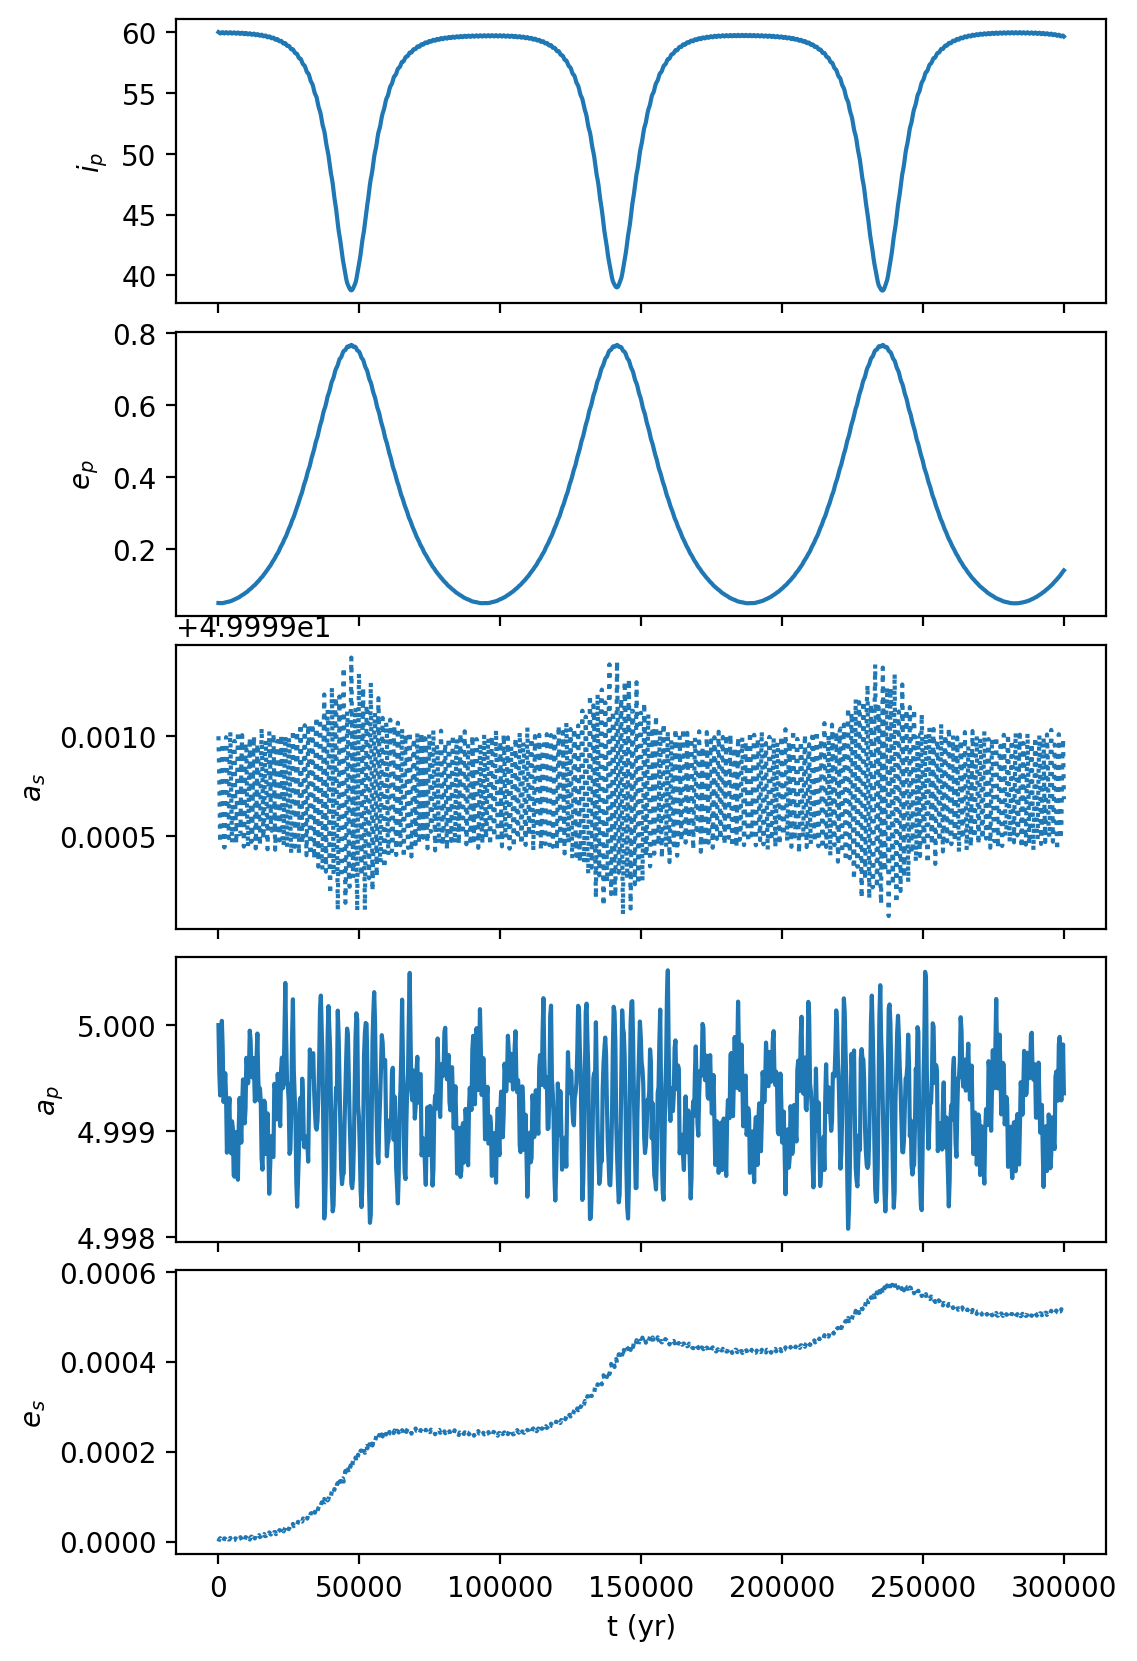

In [128]:
# Kozai example Fig 7.9
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.add(m=1)
sim.add(m=1e-3, a=5, e=0.05, inc=np.deg2rad(60))    # Jupiter inclined initially at 60 degrees
sim.add(m=0.1, a=50, e=0, inc=np.deg2rad(0))  # secondary 
sim.move_to_com()

# run it for 300,000 years
simulate_kozai(3e5)